---

# <center>Extratores de Características (SIFT, SURF, HOG)</center>

---

## ⚙️ 1. CONFIGURAÇÕES DE AMBIENTE

### 1.1 Instalação de Pacotes

In [1]:
# watermark: Exibe informações como versões de pacotes e hardware. Útil para a reproducibilidade.
# !pip install -q -U watermark

# opencv-python: Usada em processamento de imagens e visão computacional.
# !pip install -q -U opencv-python

# opencv-contrib-python: Inclui funcionalidades extras e módulos experimentais para o OpenCV.
# !pip install -q -U opencv-contrib-python

### 1.2 Carga de Pacotes

In [2]:
# Visão Computacional
import cv2

# Ambiente de Desenvolvimento
import warnings

# Scikit-image
from skimage.feature import hog

# Visualização de dados & Imagens
import matplotlib
from PIL import Image
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from IPython.display import display

# Desabilitando avisos desnecessários
warnings.filterwarnings("ignore")

### 1.3 Configurações de Máquina

In [3]:
# Imprime configurações da máquina (PC)
%reload_ext watermark
%watermark -v -m

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.15.0-92-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



### 1.4 Versões dos Pacotes Python

In [4]:
# Mostrando versões dos pacotes usados
%watermark --iversion

cv2       : 4.9.0
imageio   : 2.31.1
matplotlib: 3.7.2
PIL       : 9.4.0



## 🖼️ 2. CARREGANDO E VISUALIZANDO IMAGEM

### 2.1 Carregando Imagem

In [5]:
# Carregando a imagem com imageio
img_original = imageio.imread("imagens/cervo.jpg")

### 2.2 Visualizando Imagem

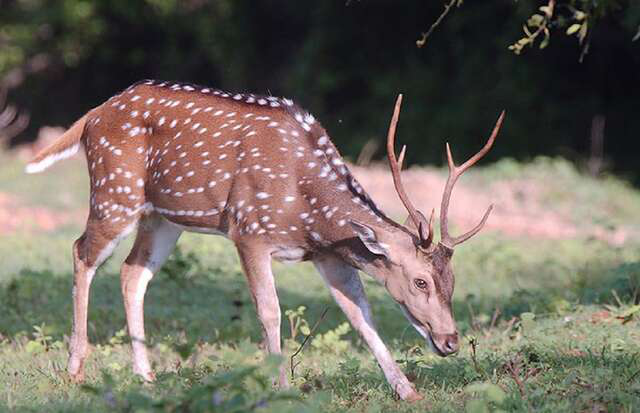

In [6]:
display(Image.open("imagens/cervo.jpg"))

## 🔍 3. Scale-Invariant Feature Transform (SIFT)

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">O Scale-Invariant Feature Transform (SIFT) é um algoritmo de extrema importância para a Visão Computacional, que permite a detecção e descrição de características locais em imagens. Desenvolvido por David Lowe, o SIFT é amplamente utilizado devido à sua robustez e eficiência, sendo capaz de identificar e isolar características distintas que são invariantes a mudanças de escala e rotação, além de serem resistentes a alterações na iluminação.</p>

### 3.1 Aplicando o SIFT

In [7]:
def SIFT(img_original):
    
    # RGB -> Gray Scale
    gray_image = cv2.cvtColor(img_original, cv2.COLOR_RGB2GRAY)
    
    # Inicializar o SIFT
    sift = cv2.SIFT_create()
    
    # Detectar keypoints e descriptors
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)
    
    # Criar uma cópia da imagem original para desenhar os keypoints
    img_copy = img_original.copy()
    
    # Desenhar keypoints na cópia da imagem
    imagem_sift = cv2.drawKeypoints(gray_image, keypoints, img_copy)
    
    # Retornando resultado
    return imagem_sift
img_sift = SIFT(img_original)

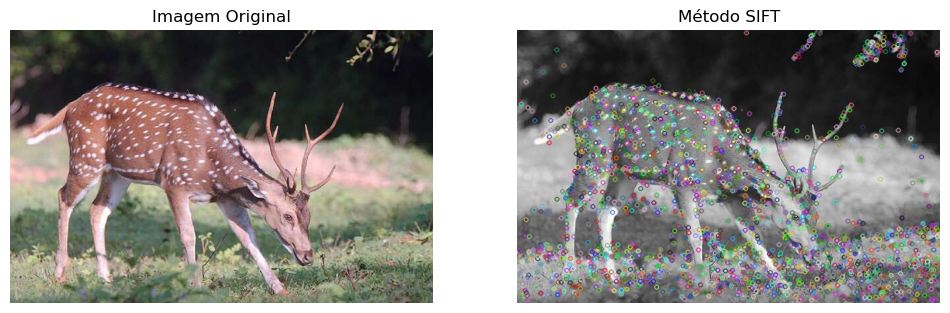

In [8]:
def plot_results(img_original, feature_extractor, title="", cmap=None):
    # Configurações do plot
    plt.figure(figsize=(12, 5))
    
    # Gráfico I - Imagem Original
    plt.subplot(1, 2, 1)
    plt.imshow(img_original)
    plt.title("Imagem Original")
    plt.axis("off")
    
    # Gráfico II - Feature Extractor
    plt.subplot(1, 2, 2)
    plt.imshow(feature_extractor, cmap=cmap)
    plt.title(f"{title}")
    plt.axis("off")
plot_results(img_original, img_sift, title="Método SIFT")
plt.savefig('imagens/SIFT.png', dpi=300, format='png', bbox_inches='tight')

## 🌊 4. Speeded-Up Robust Features (SURF)

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">O SURF (Speeded-Up Robust Features) representa um avanço significativo no campo da Visão Computacional, sendo introduzido em 2006 como uma alternativa mais rápida e eficiente ao tradicional SIFT (Scale-Invariant Feature Transform). Desenvolvido por Herbert Bay e outros, o SURF acelera o processo de detecção e descrição de características locais em imagens, mantendo uma robustez comparável ao SIFT em relação a variações de escala e rotação, e também oferece resistência a mudanças na iluminação.</p>

In [9]:
# Cria o detector ORB
orb = cv2.ORB_create()

# Detectar keypoints e descriptors
keypoints, descriptors = orb.detectAndCompute(img_original, None)

# Desenhar keypoints na imagem
imagem_com_keypoints = cv2.drawKeypoints(img_original, keypoints, None, (255, 0, 0), 4)

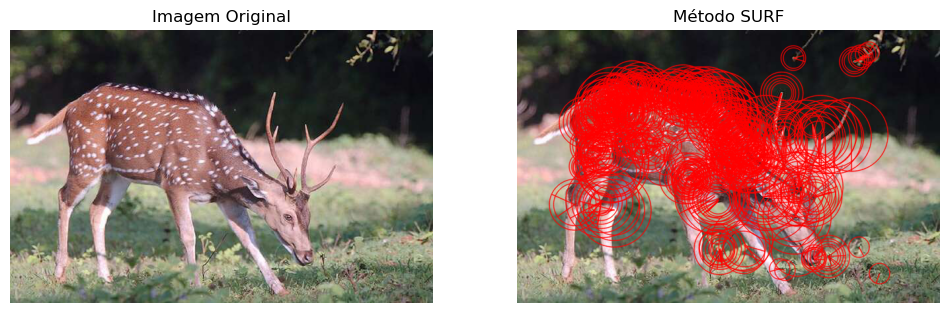

In [10]:
plot_results(img_original, imagem_com_keypoints, title="Método SURF")
plt.savefig('imagens/SURF.png', dpi=300, format='png', bbox_inches='tight')

## ✬ 5. MÉTODO HOG

<p style="font-family: Arial, sans-serif; font-size: 15px; line-height: 1.5; color: #333; text-align: justify;">O Histogram of Oriented Gradients (HOG) é um método de extração de características que se concentra na contagem da ocorrência de direções de gradientes em porções localizadas de uma imagem. Desenvolvido inicialmente para a detecção de pedestres dentro do campo da visão computacional, o HOG provou ser extremamente eficaz na caracterização de formas e estruturas locais de objetos em imagens, tornando-se um componente essencial em uma variedade de aplicações de reconhecimento de objetos.</p>

In [11]:
# Imagem em escala de cinza
gray_image = cv2.cvtColor(img_original, cv2.COLOR_RGB2GRAY)

# Extrair características HOG
fd, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

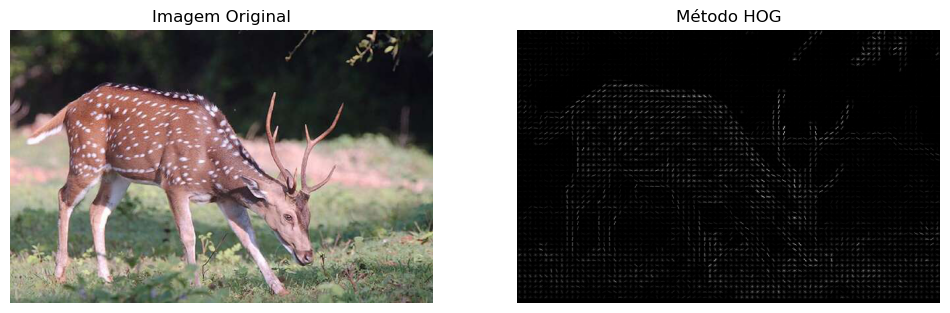

In [12]:
plot_results(img_original, hog_image, title="Método HOG", cmap="gray")
plt.savefig('imagens/HOG.png', dpi=300, format='png', bbox_inches='tight')